## Data Exploration and Processing

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# read datasets
train_df = pd.read_json("datasets/train_dataset.json", orient="columns")
test_df = pd.read_json("datasets/test_dataset.json", orient="columns")
val_df = pd.read_json("datasets/val_dataset.json", orient="columns")

df = pd.concat([train_df, val_df, test_df], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [3]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [4]:
df.shape

(7853, 17)

In [5]:
# Look at unique values of each column, except the ones formatted as list for one hot encoding
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")

unique values of graphic card type are:  ['dedicated graphics' None 'integrated graphics']
-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
-----------------------------------------------------
unique values of drive type are:  ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
-----------------------------------------------------
unique values of RAM type are:  ['ddr4' 'ddr3' None 'ddr3l']
-----------------------------------------------------
unique values of CPU 

In [6]:
#  state only takes one value so drop this column since it won't effect the price
df = df.drop(columns=['state'])
df = df.dropna()

In [7]:
# columns of communications, input_devices and multimedia include multiple values in a cell in list format
# not possible to represent them in numerics in its current format
# split the values of these columns into different columns
compact_cols = ['communications', 'input devices', 'multimedia']

In [8]:
# use to_list( ) function to split lists into columns
# example of to_list( ) function of pandas
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


In [9]:
# define function to get unique values of each features in our predefined lists and convert them to new feature names

def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

In [10]:
compact_dict = {col: [] for  col in compact_cols}

# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [11]:
# get numerical values for ram size
df['RAM size'] = df['RAM size'].str.replace(' gb','', regex=True)
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256', regex=True)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [12]:
# truncate screen size and convert to int value
df['screen size'] = df['screen size'].apply(lambda row: int(str(row[:2])))
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


In [13]:
# extract height and length as int of resoltion and drop the original column
df['resolution_x'] = df['resolution (px)'].apply(lambda row: int(row.split(' x ')[0]))
df['resolution_y'] = df['resolution (px)'].apply(lambda row: int(row.split(' x ')[1]))
df = df.drop(columns=['resolution (px)'])
df

,graphic card type,communications,CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [14]:
df.dtypes

graphic card type          object
communications             object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                 int64
buynow_price              float64
resolution_x                int64
resolution_y                int64
dtype: object

In [15]:
numerical_columns = ['CPU cores','RAM size','CPU clock speed (GHz)','drive memory size (GB)','screen size','buynow_price','resolution_x','resolution_y']
numerical_df = df[numerical_columns].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,buynow_price,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,4999.00,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,2649.00,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,4499.00,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,2099.00,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,2699.00,1920.0,1080.0
...,...,...,...,...,...,...,...,...
9211,4.0,32.0,2.8,500.0,15.0,5599.00,1920.0,1080.0
2748,4.0,8.0,2.2,1000.0,17.0,2925.36,1600.0,900.0
2072,4.0,8.0,2.6,1120.0,17.0,3799.00,1920.0,1080.0
4741,4.0,12.0,2.8,1256.0,15.0,5589.00,1920.0,1080.0


In [16]:
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummy_columns = ['drive type', 'RAM type', 'CPU model']
for col in dummy_columns:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
#extract remaining columns
y_label = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols and col not in numerical_columns and col not in dummy_columns and col not in 'operating system']
categorical_columns

['graphic card type', 'warranty']

In [18]:
categorical_df = pd.get_dummies(df[categorical_columns]).astype(int)
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
9211,1,0,1,0
2748,1,0,0,1
2072,1,0,1,0
4741,1,0,1,0


In [19]:
#create empty df containing all unique values as columns
unique_list = list()
for col in compact_cols:
    unique_list += compact_dict[col]
compact_df = pd.DataFrame(columns=unique_list, index=df.index, data= np.zeros((df.shape[0], len(unique_list))))
compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# insert 1 if laptop contains value from column
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda row: 1 if unique in row else 0)

compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [21]:
clean_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df], axis=1)
y_label_values = clean_df['buynow_price']
clean_df = clean_df.drop(columns=['buynow_price'])
clean_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,0,1,0,4.0,32.0,2.8,500.0,15.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
2748,1,0,0,1,4.0,8.0,2.2,1000.0,17.0,1600.0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,1,0,4.0,8.0,2.6,1120.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,1,0,4.0,12.0,2.8,1256.0,15.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


# Multicollinearity Check

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
#compute variance inflation factor
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['vif'] = [variance_inflation_factor(clean_df[features].values,i) for i in range(len(features))]
    return vif_data.sort_values(by=['vif']).reset_index(drop=True)
features = clean_df.columns.to_list()
vif = compute_vif(features)

/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/

In [24]:
y_label_values

7233    4999.00
5845    2649.00
5897    4499.00
4870    2099.00
2498    2699.00
         ...   
9211    5599.00
2748    2925.36
2072    3799.00
4741    5589.00
6980    8678.00
Name: buynow_price, Length: 6109, dtype: float64

In [25]:
#remove feature with highest vif score while vif score > 20 exists
multicolinearity = True

while multicolinearity:
    last_feature = vif['feature'].to_list()[-1]
    print('Remove feature = ', last_feature)
    features.remove(last_feature)
    vif = compute_vif(features)
    multicolinearity = False if len(vif[vif['vif'] > 20]) == 0 else True


/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Remove feature =  other CPU


/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/

Remove feature =  graphic card type_dedicated graphics


/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/

Remove feature =  ssd


/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/marceldeufel/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Remove feature =  ddr3
Remove feature =  warranty_producer warranty
Remove feature =  resolution_x
Remove feature =  touchpad
Remove feature =  screen size
Remove feature =  camera
Remove feature =  CPU clock speed (GHz)
Remove feature =  windows 10 home
Remove feature =  keyboard
Remove feature =  intel core i7
Remove feature =  bluetooth
Remove feature =  CPU cores
Remove feature =  microphone


In [26]:
vif

,feature,vif
0,windows 8.1 professional 32-bit,1.004397
1,windows 7 home 64-bit,1.007451
2,intel celeron m,1.019598
3,windows 7 professional 32-bit,1.022183
4,windows 8.1 home 32-bit,1.028446
5,intel core m,1.030207
6,amd a4,1.036642
7,amd e1,1.043705
8,amd a10,1.046219
9,amd a12,1.069440


In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

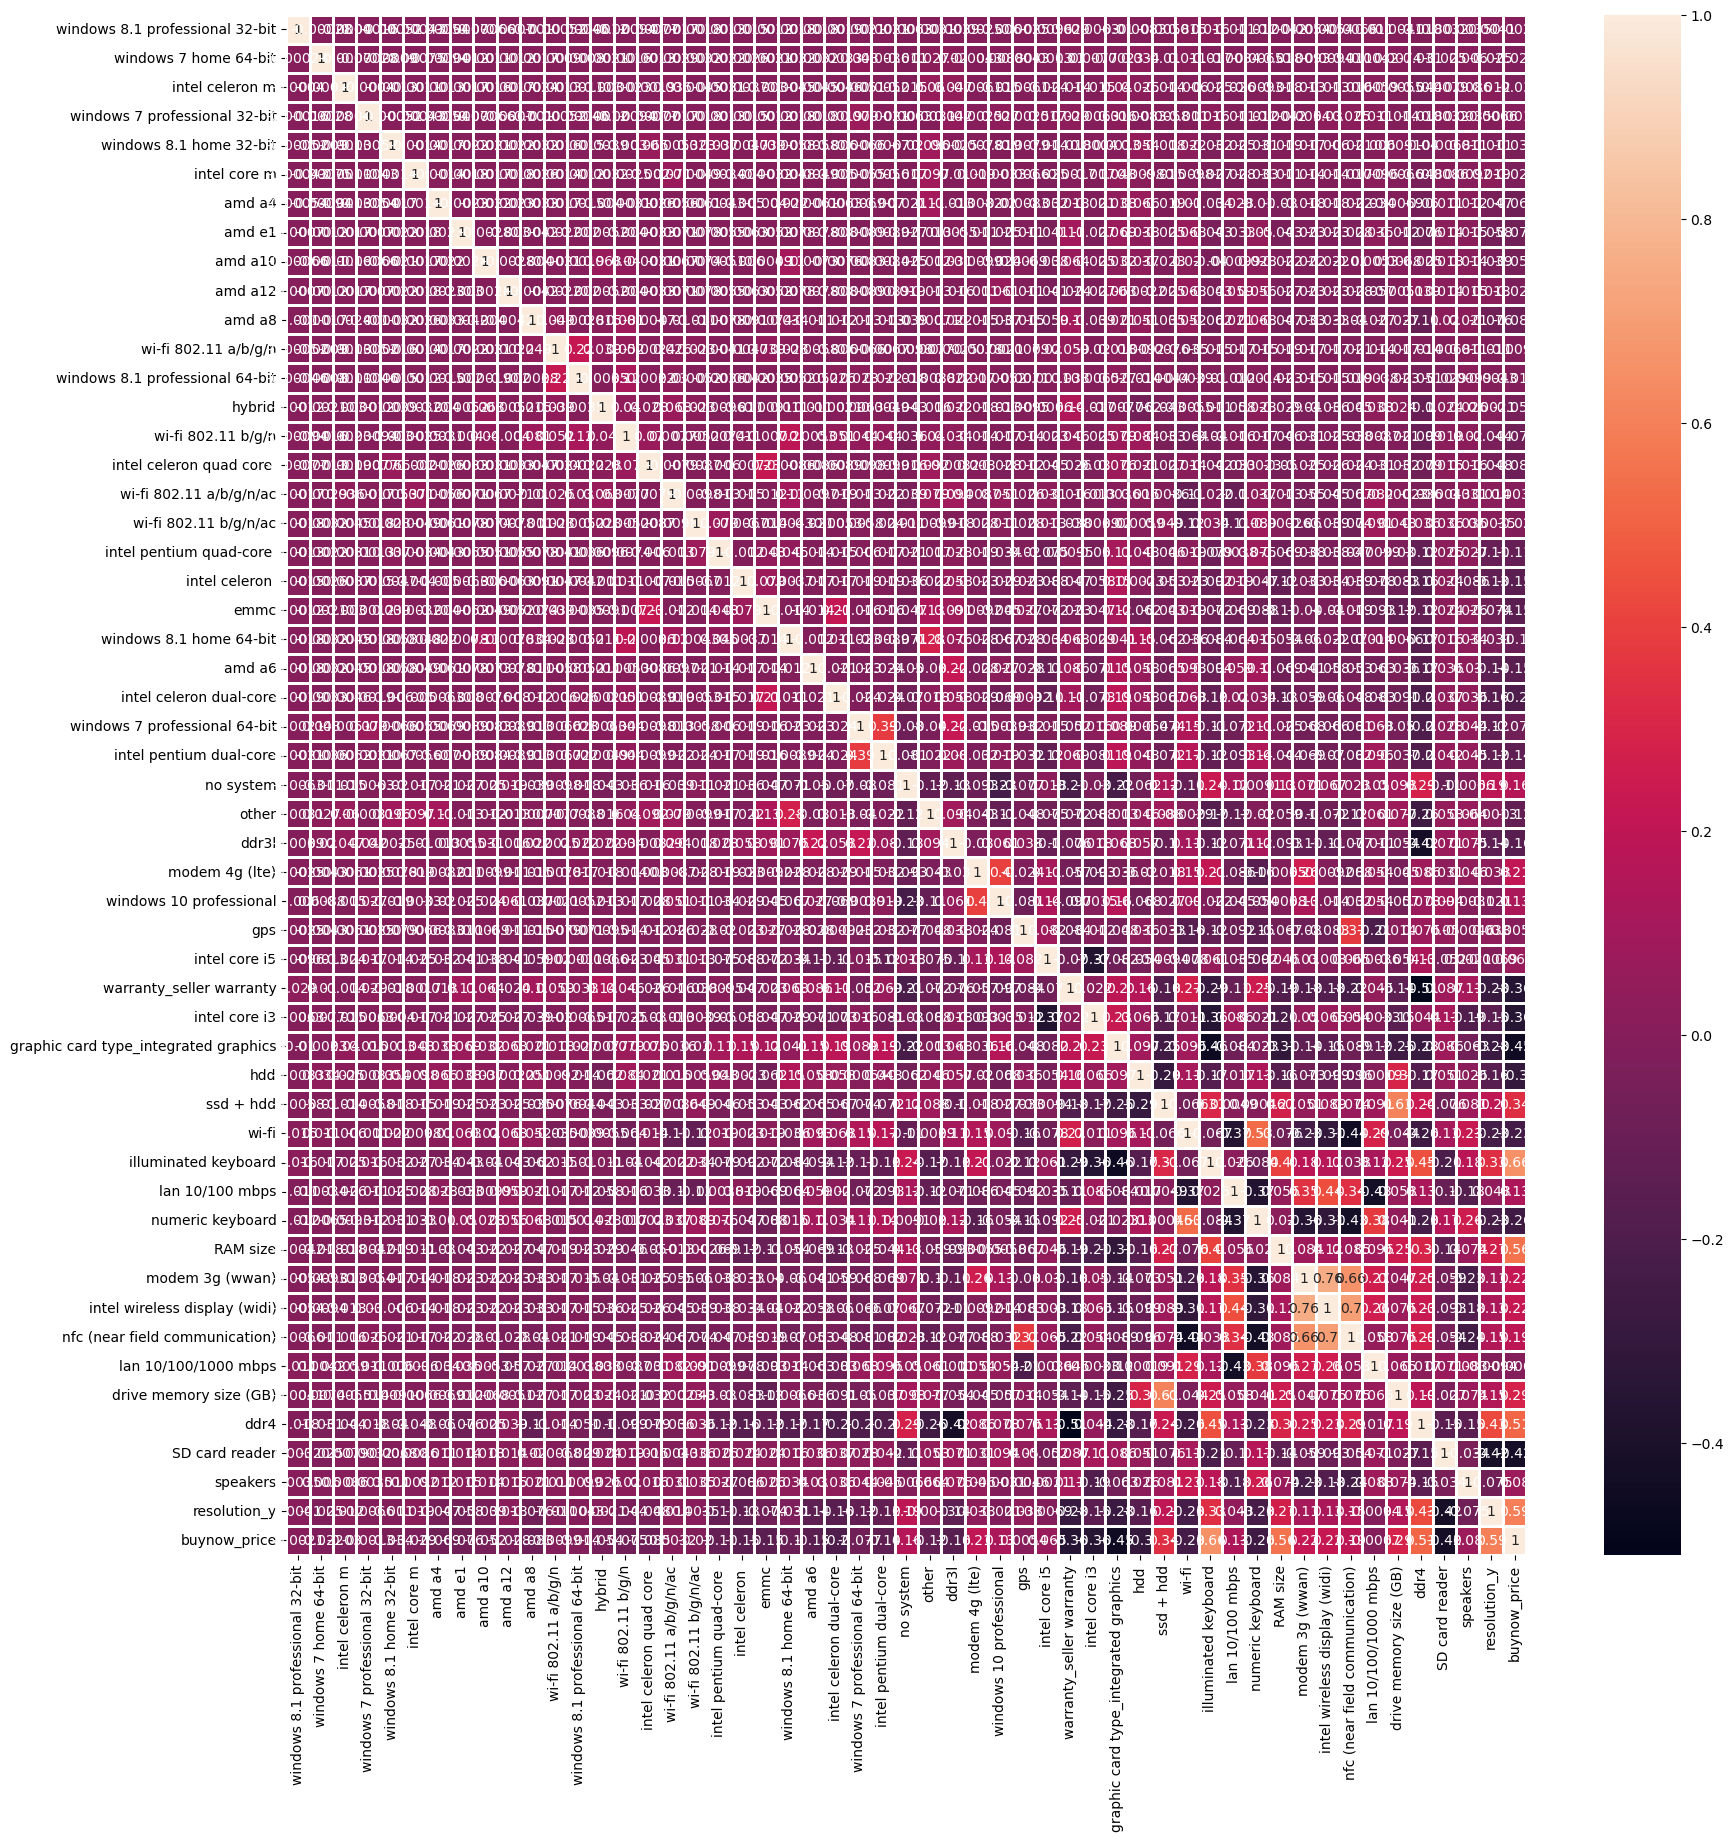

In [28]:
selected_features = vif['feature']
plt.figure(figsize=(20,20))
corr_df = pd.concat([clean_df[selected_features],df[y_label]],axis=1)
sns.heatmap(corr_df.corr(),annot=True,lw=1)
plt.show()

# Train/Val/Test

In [29]:
train_indeces = train_df.dropna().index
val_indeces = val_df.dropna().index
test_indeces = test_df.dropna().index

In [30]:
train_df = clean_df.loc[train_indeces]
val_df = clean_df.loc[val_indeces]
test_df = clean_df.loc[test_indeces]

In [31]:
train_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.60,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.40,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.20,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.00,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.40,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,0,1,0,1,4.0,6.0,1.80,256.0,15.0,1366.0,...,0,0,0,0,0,0,0,0,0,0
4816,0,1,1,0,2.0,8.0,2.00,480.0,15.0,1920.0,...,0,0,0,1,0,0,0,0,0,0
11249,0,1,0,1,2.0,4.0,1.70,500.0,12.0,1920.0,...,0,0,0,1,0,0,0,0,0,0
685,0,1,1,0,4.0,4.0,1.86,1000.0,17.0,1600.0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
X_train = train_df[selected_features].to_numpy()
X_val = val_df[selected_features].to_numpy()
X_test = test_df[selected_features].to_numpy()

In [33]:
y_train = df.loc[train_indeces][y_label].to_numpy()
y_val = df.loc[val_indeces][y_label].to_numpy()
y_test = df.loc[test_indeces][y_label].to_numpy()

In [34]:
X_train.shape

(3694, 52)

# Regression Model

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import time
import psutil

In [107]:
results = []
y_train = y_train.ravel()
def pipe(regressor_name, regressor):
    
    #train and track time 
    start_time = time.time()
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    #predict and track time
    start_time = time.time()
    predict = pipe.predict(X_test)
    inference_time = time.time()-start_time
    
    #additional performance metrics
    model_complexity = get_model_complexity(regressor)
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().percent
    
    rmse = calc_rmse(y_test, predict)
    r2 = r2_score(y_test, predict)
    print('regressor', regressor_name)
    print('rmse = ', rmse)
    print('r2_score = ', r2)
    print('Training Time:', training_time, 's')
    print('Inference Time:', inference_time, 's')
    print('Model Complexity:', model_complexity)
    print('CPU Usage:', cpu_usage,'%')
    print('Memory Usage:', memory_usage,'%')
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test, x=predict)
    results.append({
        'Algorithm':regressor_name,
        'RMSE':rmse,'R2':r2,'Training Time': training_time,
        'Inference Time': inference_time,
        'Model Complexity': model_complexity,
        'CPU Usage': cpu_usage,
        'Memory Usage': memory_usage
    })

def calc_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def get_model_complexity(regressor):
    if hasattr(regressor, 'coef_'):
        return sum(param.size for param in regressor.coef_)
    elif isinstance(regressor, DecisionTreeRegressor):
        return {
            "num_nodes": regressor.tree_.node_count,
            "max_depth": regressor.tree_.max_depth
        }
    elif isinstance(regressor, GradientBoostingRegressor):
        num_trees = len(regressor.estimators_)
        num_leaves = sum(estimator[0].get_n_leaves() for estimator in regressor.estimators_)
        return {
            "num_trees": num_trees,
            "num_leaves": num_leaves
        }
    elif isinstance(regressor, RandomForestRegressor):
        num_trees = len(regressor.estimators_)
        avg_tree_depth = sum(estimator.tree_.max_depth for estimator in regressor.estimators_) / num_trees
        return {
            "num_trees": num_trees,
            "avg_tree_depth": avg_tree_depth
        }
    else:
        return "Unknown"

regressor Linear
rmse =  61584275445745.68
r2_score =  -1.337945153595707e+21
Training Time: 0.058370113372802734 s
Inference Time: 0.0007829666137695312 s
Model Complexity: 52
CPU Usage: 17.3 %
Memory Usage: 79.7 %


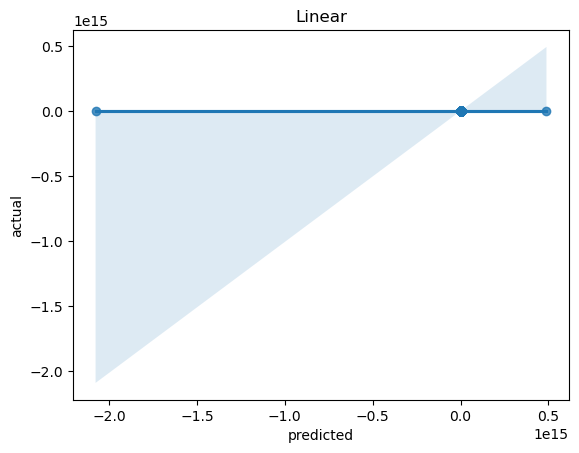

In [108]:
pipe('Linear', LinearRegression())

regressor MLP
rmse =  719.6561002119159
r2_score =  0.817295745536476
Training Time: 1.1956748962402344 s
Inference Time: 0.0009169578552246094 s
Model Complexity: Unknown
CPU Usage: 46.2 %
Memory Usage: 79.2 %


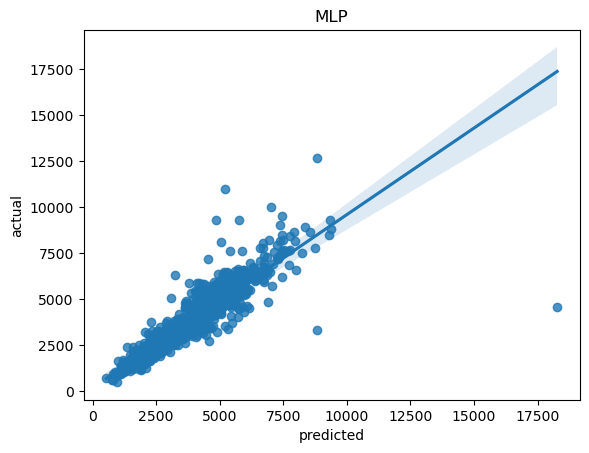

In [109]:
from sklearn.neural_network import MLPRegressor
pipe('MLP', MLPRegressor(random_state=42, max_iter=500, learning_rate='constant', learning_rate_init=0.6))

regressor DecisionTree
rmse =  657.9218983228617
r2_score =  0.8472970870177312
Training Time: 0.02117013931274414 s
Inference Time: 0.0008819103240966797 s
Model Complexity: {'num_nodes': 3491, 'max_depth': 15}
CPU Usage: 15.4 %
Memory Usage: 79.1 %


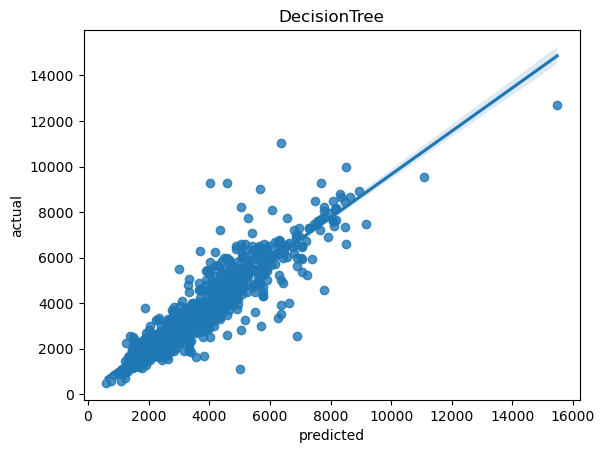

In [110]:
from sklearn.tree import DecisionTreeRegressor
pipe('DecisionTree', DecisionTreeRegressor(max_depth=15, random_state=42))

regressor RandomForest
rmse =  556.807647596222
r2_score =  0.890627277810145
Training Time: 0.6050970554351807 s
Inference Time: 0.01476287841796875 s
Model Complexity: {'num_trees': 100, 'avg_tree_depth': 26.12}
CPU Usage: 18.1 %
Memory Usage: 79.7 %


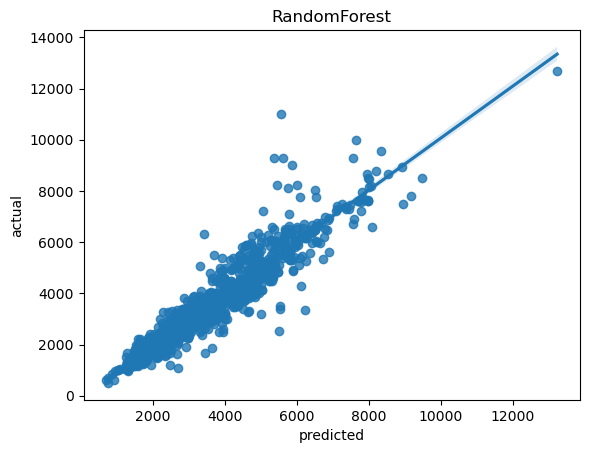

In [111]:
from sklearn.ensemble import RandomForestRegressor
pipe('RandomForest', RandomForestRegressor(random_state=42))

regressor GradientBoostingRegressor
rmse =  557.6065727952811
r2_score =  0.890313189767482
Training Time: 0.2309248447418213 s
Inference Time: 0.0013170242309570312 s
Model Complexity: {'num_trees': 100, 'num_leaves': 793}
CPU Usage: 16.2 %
Memory Usage: 79.9 %


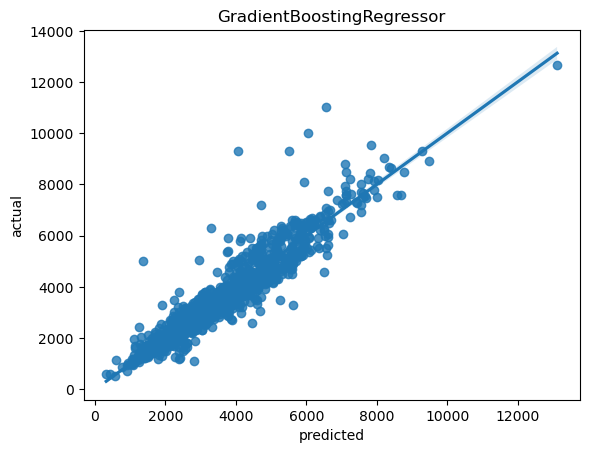

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
pipe('GradientBoostingRegressor',
     GradientBoostingRegressor(random_state=42, criterion='squared_error', loss='squared_error',
                               learning_rate=0.7, warm_start=True))

In [116]:
df = pd.DataFrame(results)

def highlight_min_max(s):
    is_numeric = pd.to_numeric(s, errors='coerce').notna()
    s_numeric = s[is_numeric]
    is_min = s == s_numeric.min()
    is_max = s == s_numeric.max()
    return ['background-color: lightcoral' if v else 'background-color: lightgreen' if is_max[idx] else '' for idx, v in is_min.items()]

# Apply the highlight function to the DataFrame
df_styled = df.style.apply(highlight_min_max, subset=pd.IndexSlice[:, df.columns.difference(['Algorithm', 'Model Complexity'])])

# Display the styled DataFrame
df_styled

,Algorithm,RMSE,R2,Training Time,Inference Time,Model Complexity,CPU Usage,Memory Usage
0,Linear,61584275445745.679688,-1337945153595706966016.000000,0.058370,0.000783,52,17.300000,79.700000
1,MLP,719.656100,0.817296,1.195675,0.000917,Unknown,46.200000,79.200000
2,DecisionTree,657.921898,0.847297,0.021170,0.000882,"{'num_nodes': 3491, 'max_depth': 15}",15.400000,79.100000
3,RandomForest,556.807648,0.890627,0.605097,0.014763,"{'num_trees': 100, 'avg_tree_depth': 26.12}",18.100000,79.700000
4,GradientBoostingRegressor,557.606573,0.890313,0.230925,0.001317,"{'num_trees': 100, 'num_leaves': 793}",16.200000,79.900000


## Deep Learning with TensorFlow

In [118]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

In [143]:
tf.random.set_seed(42)

#define function for measuring errors
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

#define learning rate scheduler
def scheduler(epoch,lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.01))

#define base model
def build_model():
    model = keras.Sequential([
        layers.Normalization(axis=1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='relu'),
    ])
    
    model.compile(loss=rmse, optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None, len(selected_features)))
    
    return model

In [144]:
dnn_model=build_model()

In [145]:
dnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 52)             │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,762 (14.70 KB)

 Trainable params: 3,657 (14.29 KB)

 Non-trainable params: 105 (424.00 B)

In [146]:
#initialize scheduler and build in early stopping 
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0,patience=20, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True)

# train base model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=400)

Epoch 1/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 2751.9983 - val_loss: 1329.1338 - learning_rate: 0.0050
Epoch 2/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 1345.1666 - val_loss: 1298.0867 - learning_rate: 0.0050
Epoch 3/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1333.2987 - val_loss: 1254.1520 - learning_rate: 0.0050
Epoch 4/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1298.0828 - val_loss: 1227.2444 - learning_rate: 0.0050
Epoch 5/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1251.2662 - val_loss: 1185.1703 - learning_rate: 0.0050
Epoch 6/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1203.5155 - val_loss: 1121.8992 - learning_rate: 0.0050
Epoch 7/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1151.4054 - val_loss: 1105.9431 - learning_rate: 0.0050
Epoch 8/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 1094.7836 - val_loss: 1014.7372 - learning_rate: 0.0050
Epoch 9/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 371u

Epoch 55/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 852.2670 - val_loss: 741.2479 - learning_rate: 0.0039
Epoch 56/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 830.1560 - val_loss: 800.8008 - learning_rate: 0.0039
Epoch 57/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 831.8108 - val_loss: 755.2441 - learning_rate: 0.0038
Epoch 58/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 824.5793 - val_loss: 764.5616 - learning_rate: 0.0038
Epoch 59/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 821.5610 - val_loss: 734.6854 - learning_rate: 0.0037
Epoch 60/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 832.0147 - val_loss: 722.3286 - learning_rate: 0.0037
Epoch 61/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 836.4405 - val_loss: 721.8273 - learning_rate: 0.0037
Epoch 62/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 814.7708 - val_loss: 717.5383 - learning_rate: 0.0036
Epoch 63/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step 

Epoch 109/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 777.7444 - val_loss: 702.6561 - learning_rate: 0.0023
Epoch 110/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 788.7819 - val_loss: 694.9402 - learning_rate: 0.0022
Epoch 111/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 790.1803 - val_loss: 676.2433 - learning_rate: 0.0022
Epoch 112/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 785.9664 - val_loss: 672.1790 - learning_rate: 0.0022
Epoch 113/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 773.7297 - val_loss: 672.5034 - learning_rate: 0.0022
Epoch 114/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 792.9446 - val_loss: 677.1579 - learning_rate: 0.0022
Epoch 115/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 788.0837 - val_loss: 671.2767 - learning_rate: 0.0021
Epoch 116/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 776.1032 - val_loss: 674.0538 - learning_rate: 0.0021
Epoch 117/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 37

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 784.3628 - val_loss: 668.3784 - learning_rate: 0.0013
Epoch 163/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 772.5434 - val_loss: 656.5884 - learning_rate: 0.0013
Epoch 164/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 781.1677 - val_loss: 680.0917 - learning_rate: 0.0013
Epoch 165/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 769.6221 - val_loss: 667.7789 - learning_rate: 0.0013
Epoch 166/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 771.7186 - val_loss: 664.7116 - learning_rate: 0.0013
Epoch 167/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 761.8096 - val_loss: 656.3552 - learning_rate: 0.0013
Epoch 168/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 780.5591 - val_loss: 679.7108 - learning_rate: 0.0013
Epoch 169/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 780.7056 - val_loss: 675.7161 - learning_rate: 0.0012
Epoch 170/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - los

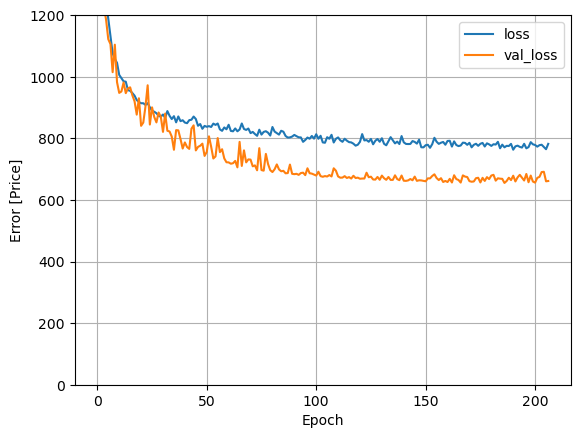

In [147]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1200])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [148]:
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 735.1517


724.71142578125

In [151]:
# define complex model
def build_and_compile_complex_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=rmse,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

In [152]:
dnn_model = build_and_compile_complex_model()

In [153]:
dnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 52)             │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,098 (16.01 KB)

 Trainable params: 3,993 (15.60 KB)

 Non-trainable params: 105 (424.00 B)

In [154]:
#train with more complex model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=50)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 2324.7209 - val_loss: 1291.1012 - learning_rate: 0.0050
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1329.1860 - val_loss: 1273.1167 - learning_rate: 0.0050
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1282.6360 - val_loss: 1223.4966 - learning_rate: 0.0050
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1255.0962 - val_loss: 1186.7926 - learning_rate: 0.0050
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 1164.0212 - val_loss: 1073.6666 - learning_rate: 0.0050
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 1078.7043 - val_loss: 1024.3488 - learning_rate: 0.0050
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1047.6329 - val_loss: 974.0099 - learning_rate: 0.0050
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 1000.4413 - val_loss: 957.7967 - learning_rate: 0.0050
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - lo

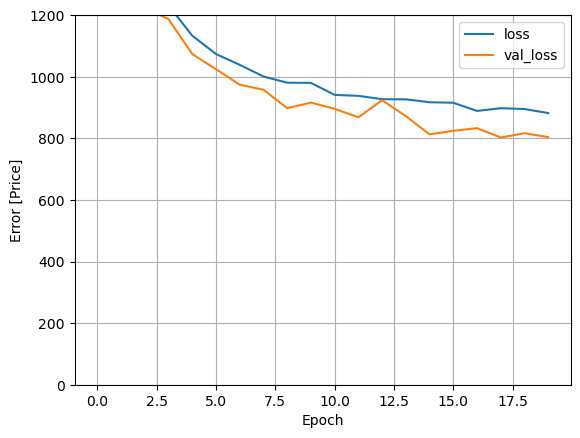

In [155]:
plot_loss(history)

In [156]:
# test complex model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1338.2848


1326.559814453125

The complex model performed worse than the base model which indicates that solving this task with deep neural networks might not be the right choice. Overall none of the 2 neural networks performed better than the best ML Algorithm which was RandomForest